In [120]:
# this an adaptation of the kernel created by meikegw. Mainly just added some more verbose explanation
# and were functions ('def') are used, alternatives where provided for who to do the same without
# creating the functions. //Special Thanks to Meikegw!

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

      #from subprocess import check_output
      #print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [121]:
import os
os.getcwd()

'/Users/steven/Documents/Kaggle/Houses'

In [122]:
houseprice = pd.read_csv('/Users/steven/Documents/Kaggle/Houses/data/train.csv')
# or ...pd.read_csv('../input/train.csv')

#pandas.set_option('display.max_columns', None)

In [123]:
houseprice.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [124]:
# To check how many columns have missing values:
def show_missing():
    missing = houseprice.columns[houseprice.isnull().any()].tolist()
    return missing
#thank you @meikegw

# This can also be done without creating a function, but this is somewhat less 'pretty
# by using the follwing:
# houseprice[houseprice.columns[houseprice.isnull().any()].tolist()].isnull().sum()

In [125]:
# Let's see how much work there is to be done regarding cleaning up NaN's and missing values
# this bit will come back several times to check out progress.
houseprice[show_missing()].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [126]:
# check correlation with LotArea
houseprice['LotFrontage'].corr(houseprice['LotArea'])

0.42609501877180816

In [127]:
# improvement - and good enough for now
houseprice['SqrtLotArea']=np.sqrt(houseprice['LotArea'])
houseprice['LotFrontage'].corr(houseprice['SqrtLotArea'])

0.6020022167939364

In [128]:
# Looking at categorical values
def cat_exploration(column):
    return houseprice[column].value_counts()

In [129]:
# Imputing the missing values
def cat_imputation(column, value):
    houseprice.loc[houseprice[column].isnull(),column] = value

In [130]:
houseprice.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,91.923882
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,97.979590
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,106.066017
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,97.724101
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,119.415242
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,118.806565
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,100.419122
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,101.892100
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,78.230429
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2008,WD,Normal,118000,86.139422


In [131]:
# Saeborn for visualisations, pylab inline make them within this notebook window.
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/steven/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cond']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


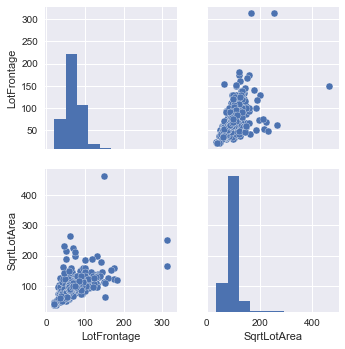

In [132]:
# pairplot is good for visualising small amount of variables
# Keep in mind when chosing pairplot; amount of plots is exponential, 2 vars is 2^2, 
# for 10 vars is is 10^2, etc..
sns.pairplot(houseprice[['LotFrontage','SqrtLotArea']].dropna())

In [133]:
# take the cells with empty values in LotFrontage
cond = houseprice['LotFrontage'].isnull()

In [134]:
#replace those ecells with values from the correlated SqrtLotArea
houseprice.LotFrontage[cond] = houseprice.SqrtLotArea[cond]

/Users/steven/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [135]:
houseprice.head(8)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,91.923882
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,97.979590
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,106.066017
3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,97.724101
4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,119.415242
5,6,50,RL,85.0000,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,118.806565
6,7,20,RL,75.0000,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,100.419122
7,8,60,RL,101.8921,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,101.892100


In [136]:
#check whether LotFrontage is no longer in list of missing values
houseprice[show_missing()].isnull().sum()

Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [137]:
cat_exploration('Alley')
# This cat_exploration is possible because we have created this function (def..)
# If you haven't same result can be gotten with te following:

# houseprice['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [138]:
# I assume empty fields here means no alley access
cat_imputation('Alley','None')
# again, this is possible because we have created this function (input 12).
# If we hadn't done this, we would get the same result with the following:

# houseprice.loc[houseprice['Alley'].isnull(),'Alley'] = 'None'

In [139]:
# Let's see how much work there is to be done regarding cleaning up NaN's and missing values
# this bit will come back several times to check out progress.

houseprice[show_missing()].isnull().sum()
# As said before, this can be done without using the created function (def..) 
# by using the following:

# houseprice[houseprice.columns[houseprice.isnull().any()].tolist()].isnull().sum()

MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [140]:
houseprice['MasVnrType'].isnull().sum()

8

In [141]:
# Is MasVnrArea empty when MasVnrType is empty?
houseprice[['MasVnrType','MasVnrArea']][houseprice['MasVnrType'].isnull()==True]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [143]:
# What do the values look like for MasVnrType?
cat_exploration('MasVnrType')
# or:
# houseprice['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [145]:
#cat_exploration('MasVnrArea')

In [99]:
# Mostly 'None' so we for now will replace NaN's with None's, 
# and for MasVnrArea replace NaN with zero.
cat_imputation('MasVnrType', 'None')
cat_imputation('MasVnrArea', 0.0)

In [100]:
# A lot of variables which are all basement related. Create group, see group to check whether all are
# Nan and zero together:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
houseprice[basement_cols][houseprice['BsmtQual'].isnull()==True]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
17,NaN,NaN,NaN,NaN,NaN,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0


In [101]:
# Little loop here. Its details confused me. Goes through each of column (x) within
# the created basement 'group'. For each column it goes through the cat_imputation funtcion which
# does this: 

# houseprice.loc[houseprice['x'].isnull(),'x'] = 'None'

# The 'FinSF' is to differentiate between the numerical (both contain 'FinSF' in header) 
# and the categorical which already contain zero's. 

for x in basement_cols:
    if 'FinSF'not in x:
        cat_imputation(x,'None')

In [102]:
# Let's see how much work there is to be done regarding cleaning up NaN's and missing values
# this bit will come back several times to check out progress.

houseprice[show_missing()].isnull().sum()

Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [103]:
cat_exploration('Electrical')

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [104]:
houseprice['Electrical'].isnull().sum()

1

In [105]:
# Just one missing, impute most frequent value (SBrkr with 1334 instances)
cat_imputation('Electrical','SBrkr')

In [106]:
# Let's see how much work there is to be done regarding cleaning up NaN's and missing values
# this bit will come back several times to check out progress.

houseprice[show_missing()].isnull().sum()

FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [107]:
cat_exploration('FireplaceQu')

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [108]:
houseprice['FireplaceQu'].isnull().sum()

690

In [109]:
#houseprice['Fireplaces'][houseprice['FireplaceQu'].isnull()==True].describe()

#checking whether FireplaceQu might be empty especially when fireplace itself is missing
houseprice[['Fireplaces','FireplaceQu']][houseprice['FireplaceQu'].isnull()==True]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
17,0,NaN
18,0,NaN
19,0,NaN
26,0,NaN
29,0,NaN


In [110]:
#So yes, it seems that indeed FireplaceQu is empty when Fireplaces is missing.
#Assumption therefore will be that Fireplaces is empty because there is no fireplace.
cat_imputation('FireplaceQu','None')

In [111]:
pd.crosstab(houseprice.Fireplaces, houseprice.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,None,Po,TA
Fireplaces,,,,,,
0,0,0,0,690,0,0
1,19,28,324,0,20,259
2,4,4,54,0,0,53
3,1,1,2,0,0,1


In [112]:
# Let's see how much work there is to be done regarding cleaning up NaN's and missing values
# this bit will come back several times to check out progress.

houseprice[show_missing()].isnull().sum()

GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [113]:
#Same idea as with basement columns.
#garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
#houseprice[garage_cols][houseprice['GarageType'].isnull()==True]

# Later on it doesn't recognize garage_cols.. workaround:
houseprice[['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']][houseprice['GarageType'].isnull()==True]



,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
99,NaN,NaN,NaN,NaN,NaN,0,0
108,NaN,NaN,NaN,NaN,NaN,0,0
125,NaN,NaN,NaN,NaN,NaN,0,0
127,NaN,NaN,NaN,NaN,NaN,0,0
140,NaN,NaN,NaN,NaN,NaN,0,0


In [116]:
#Garage Imputation
#for x in garage_cols:
#    if houseprice[cols].dtype==np.object:
#        cat_imputation(x,'None')
#    else:
#        cat_imputation(x, 0)
        
# doesn't recognize garage_cols.. or cols..



NameError: name 'cols' is not defined

In [117]:
# Let's see how much work there is to be done regarding cleaning up NaN's and missing values
# this bit will come back several times to check out progress.

houseprice[show_missing()].isnull().sum()

GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [118]:
cat_exploration('PoolQC')

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [59]:
# is Poolarea missing when PoolQC is missing?
houseprice['PoolArea'][houseprice['PoolQC'].isnull()==True].describe()

count    1453.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: PoolArea, dtype: float64

In [60]:
# So, here I am going to delete this feature because Pool itself is so often not present, poolQC
# will not be a good feature for modelling. (this should technically be done only after visualising etc)
del houseprice['PoolQC']

In [61]:
# If you don't want to delete: cat_imputation('PoolQC', 'None')

In [62]:
cat_imputation('Fence', 'None')

In [63]:
cat_imputation('MiscFeature', 'None')

In [64]:
# Let's see how much work there is to be done regarding cleaning up NaN's and missing values
# this bit will come back several times to check out progress.

houseprice[show_missing()].isnull().sum()

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [98]:
#houseprices.to_csv('../pathhere../submission.csv', index=False)

In [99]:
os.getcwd()

'/kaggle/working'

In [109]:
#houseprice.to_csv('/Users/steven/Documents/Kaggle/cnerwnvew.csv')

In [146]:
houseprice.to_csv('almostcleanhouses.csv')